Initialize the environment

In [ ]:
from TamGen_Demo import TamGenDemo, prepare_pdb_data
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

worker = TamGenDemo(
    data="./TamGen_Demo_Data",
    ckpt="checkpoints/crossdock_pdb_A10/checkpoint_best.pt",
    use_conditional=True
)

pdb_id = "1HVH"
prepare_pdb_data(pdb_id,)
worker.reload_data(subset="gen_" + pdb_id.lower())

Namespace(no_progress_bar=False, log_interval=1000, log_format=None, tensorboard_logdir='', tbmf_wrapper=False, seed=1, cpu=False, fp16=False, memory_efficient_fp16=False, fp16_init_scale=128, fp16_scale_window=None, fp16_scale_tolerance=0.0, min_loss_scale=0.0001, threshold_loss_scale=None, user_dir=None, criterion='cross_entropy', tokenizer=None, bpe=None, optimizer='nag', lr_scheduler='fixed', task='translation_coord', num_workers=1, skip_invalid_size_inputs_valid_test=False, max_tokens=1024, max_sentences=None, required_batch_size_multiple=8, dataset_impl=None, gen_subset='gen_8fln', num_shards=1, shard_id=0, path='checkpoints/crossdock_pdb_A10/checkpoint_best.pt', remove_bpe=None, quiet=False, model_overrides='{}', results_path=None, beam=20, nbest=20, max_len_a=0, max_len_b=200, min_len=1, match_source_len=False, no_early_stop=False, unnormalized=False, no_beamable_mm=False, lenpen=1, unkpen=0, replace_unk=None, sacrebleu=False, score_reference=False, prefix_size=0, prefix_string

/root/miniconda3/envs/TamGen/lib/python3.9/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
  0%|          | 0/1 [00:00<?, ?it/s]

Processing 5ool


100%|██████████| 1/1 [00:06<00:00,  6.37s/it]


Namespace(no_progress_bar=False, log_interval=1000, log_format=None, tensorboard_logdir='', tbmf_wrapper=False, seed=1, cpu=False, fp16=False, memory_efficient_fp16=False, fp16_init_scale=128, fp16_scale_window=None, fp16_scale_tolerance=0.0, min_loss_scale=0.0001, threshold_loss_scale=None, user_dir=None, criterion='cross_entropy', tokenizer=None, bpe=None, optimizer='nag', lr_scheduler='fixed', task='translation', source_lang='tg', target_lang='m1', trainpref=None, validpref=None, testpref='TamGen_Demo_Data/src/gen_5ool', destdir='TamGen_Demo_Data/tmp', thresholdtgt=0, thresholdsrc=0, tgtdict='/workspace/workspace/TamGen/dict/dict.m1.txt', srcdict='/workspace/workspace/TamGen/dict/dict.tg.txt', nwordstgt=-1, nwordssrc=-1, alignfile=None, dataset_impl='mmap', joined_dictionary=False, only_source=False, padding_factor=8, workers=4)
| [tg] Dictionary: 24 types
| [tg] TamGen_Demo_Data/src/gen_5ool.tg: 1 sents, 48 tokens, 0.0% replaced by <unk>
| [m1] Dictionary: 961 types
| [m1] TamGen_D

In [2]:
from TamGen_RL import TamGenRL
import torch
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

worker = TamGenRL(
    data="./TamGen_Demo_Data",
    ckpt="checkpoints/crossdocked_model/checkpoint_best.pt",
    use_conditional=True
)

Namespace(no_progress_bar=False, log_interval=1000, log_format=None, tensorboard_logdir='', tbmf_wrapper=False, seed=1, cpu=False, fp16=False, memory_efficient_fp16=False, fp16_init_scale=128, fp16_scale_window=None, fp16_scale_tolerance=0.0, min_loss_scale=0.0001, threshold_loss_scale=None, user_dir=None, criterion='cross_entropy', tokenizer=None, bpe=None, optimizer='nag', lr_scheduler='fixed', task='translation_coord', num_workers=1, skip_invalid_size_inputs_valid_test=False, max_tokens=1024, max_sentences=None, required_batch_size_multiple=8, dataset_impl=None, gen_subset='gen_8fln', num_shards=1, shard_id=0, path='checkpoints/crossdocked_model/checkpoint_best.pt', remove_bpe=None, quiet=False, model_overrides='{}', results_path=None, beam=20, nbest=20, max_len_a=0, max_len_b=200, min_len=1, match_source_len=False, no_early_stop=False, unnormalized=False, no_beamable_mm=False, lenpen=1, unkpen=0, replace_unk=None, sacrebleu=False, score_reference=False, prefix_size=0, prefix_string

Set the PDB you want to generate cmpds

In [5]:
worker.reload_data(subset="gen_" + pdb_id.lower())

final_smiles = worker.sample(
    m_sample=10000,      # Tiny
    num_iter=30,      # Just 2 iterations  
    latent_dim=256,
    alpha=0.4,
    top_k=10,
    lambda_sas=0.3,
    lambda_logp=0.1,
    lambda_mw=0.1,
    maxseed=50,       # Just 2 seeds
    use_cuda=torch.cuda.is_available()
)

| loaded 1 examples from: ./TamGen_Demo_Data/gen_5ool.tg-m1.tg
| loaded 1 examples from: ./TamGen_Demo_Data/gen_5ool.tg-m1.m1
| ./TamGen_Demo_Data gen_5ool tg-m1 1 examples
| loaded 1 examples from: ./TamGen_Demo_Data/gen_5ool.tg-m1.tg.coord
⚙️  Starting closed-loop optimization...

🚀 Iteration 1/30


  0%|          | 0/50 [00:00<?, ?it/s]

📦 Stored protein input with shape: torch.Size([1, 47])


 98%|█████████▊| 49/50 [00:54<00:01,  1.12s/it]


Total valid SMILES and latents after all seeds: 49
Unique SMILES this iteration: 1 / 49
📊 Optimizing latent space...
[WARNING] Only 1 unique SMILES in top_k_z.
WARNING - Very low diversity! Consider increasing noise or reducing shift.
   ✔ Optimization complete.
💾 Saving latent vectors and rewards...
✅ Iteration 1 complete.

🚀 Iteration 2/30
🔄 Generating from 49 shifted latent vectors...
Unique SMILES this iteration: 17 / 49
📊 Optimizing latent space...
   ✔ Optimization complete.
💾 Saving latent vectors and rewards...
✅ Iteration 2 complete.

🚀 Iteration 3/30
🔄 Generating from 49 shifted latent vectors...
Unique SMILES this iteration: 17 / 49
📊 Optimizing latent space...
   ✔ Optimization complete.
💾 Saving latent vectors and rewards...
✅ Iteration 3 complete.

🚀 Iteration 4/30
🔄 Generating from 49 shifted latent vectors...
Unique SMILES this iteration: 14 / 49
📊 Optimizing latent space...
   ✔ Optimization complete.
💾 Saving latent vectors and rewards...
✅ Iteration 4 complete.

🚀 It

Visualize

In [11]:
for i in final_smiles:
    print(i)

O=C1[C@@H](NS(=O)(=O)c2ccc3cc(Cl)ccc3c2)CCN1c1ccc([C@H]2CCCN2)cc1F
O=C1[C@@H](NS(=O)(=O)c2ccc3cc(Cl)ccc3c2)CCN1c1ccc2c(c1F)CCNC2
C[C@@H](C(=O)N1CCOCC1)N1CC[C@H](NS(=O)(=O)c2nc(-c3ccc(Cl)s3)n[nH]2)C1=O
C[C@@H](C(=O)N1CCOCC1)N1CC[C@H](NS(=O)(=O)c2ccc3cc(Cl)ccc3c2)C1=O
C[C@@H](C(=O)N1CCOCC1)N1CC[C@H](NS(=O)(=O)c2ccc3cc(Cl)ccc3c2)C1=O
O=C1[C@@H](NS(=O)(=O)c2ccc3cc(Cl)ccc3c2)CCN1c1ccc([C@H]2CCCN2)cc1F
O=C1[C@@H](NS(=O)(=O)c2ccc3cc(Cl)ccc3c2)CCN1c1ccc2c(c1F)CCNC2
O=C1[C@@H](NS(=O)(=O)c2ccc3cc(Cl)ccc3c2)CCN1c1ccc([C@H]2CCCN2)cc1F
C[C@]12CCc3c(ccc4cc(O)ccc34)[C@@H]1CCC2=O
C[C@@H](C(=O)N1CCOCC1)N1CC[C@H](NS(=O)(=O)c2ccc3cc(Cl)ccc3c2)C1=O
C[C@]12CCc3c(ccc4cc(O)ccc34)[C@@H]1CCC2=O
C[C@@H](C(=O)N1CCOCC1)N1CC[C@H](NS(=O)(=O)c2cc3cc(Cl)ccc3s2)C1=O
Cc1cc(O)c2c(c1)C(=O)c1cc(O)cc(O)c1C2=O
CS(=O)(=O)n1cc2c(n1)CN([C@H]1CO[C@H](c3cc(F)c(F)cc3F)[C@@H](N)C1)C2
O=C1[C@@H](NS(=O)(=O)c2ccc3cc(Cl)ccc3c2)CCN1c1ccc([C@H]2CCCN2)cc1F
C[C@@H](C(=O)N1CCOCC1)N1CC[C@H](NS(=O)(=O)c2ccc3cc(Cl)ccc3c2)C1=O
O=C(O)c1ccc(O[C@

In [12]:
from rdkit import Chem

valid_smiles = []
invalid_smiles = []

for smi in final_smiles:
    mol = Chem.MolFromSmiles(smi)
    if mol:
        valid_smiles.append(smi)
    else:
        invalid_smiles.append(smi)

print(f"✅ Valid: {len(valid_smiles)}")
print(f"❌ Invalid: {len(invalid_smiles)}")

✅ Valid: 49
❌ Invalid: 0


🔬 REWARD CONVERGENCE ANALYSIS
📊 Found 30 iteration files
   Iter 1: 49 molecules, 1 unique, reward range [-3.104, -3.104]
   Iter 2: 49 molecules, 10 unique, reward range [-2.925, -2.289]
   Iter 3: 49 molecules, 13 unique, reward range [-3.458, -2.273]
   Iter 4: 49 molecules, 15 unique, reward range [-3.051, -2.447]
   Iter 5: 49 molecules, 15 unique, reward range [-2.827, -2.447]
   Iter 6: 49 molecules, 18 unique, reward range [-3.600, -2.414]
   Iter 7: 49 molecules, 11 unique, reward range [-2.925, -2.447]
   Iter 8: 49 molecules, 16 unique, reward range [-2.925, -2.414]
   Iter 9: 49 molecules, 13 unique, reward range [-2.925, -2.414]
   Iter 10: 49 molecules, 9 unique, reward range [-2.925, -2.458]
   Iter 11: 49 molecules, 9 unique, reward range [-2.925, -2.458]
   Iter 12: 49 molecules, 17 unique, reward range [-3.051, -2.289]
   Iter 13: 49 molecules, 11 unique, reward range [-2.925, -2.289]
   Iter 14: 49 molecules, 16 unique, reward range [-2.955, -2.289]
   Iter 15: 49 mo

📊 Analysis plot saved to 'latent_logs/reward_analysis.png'


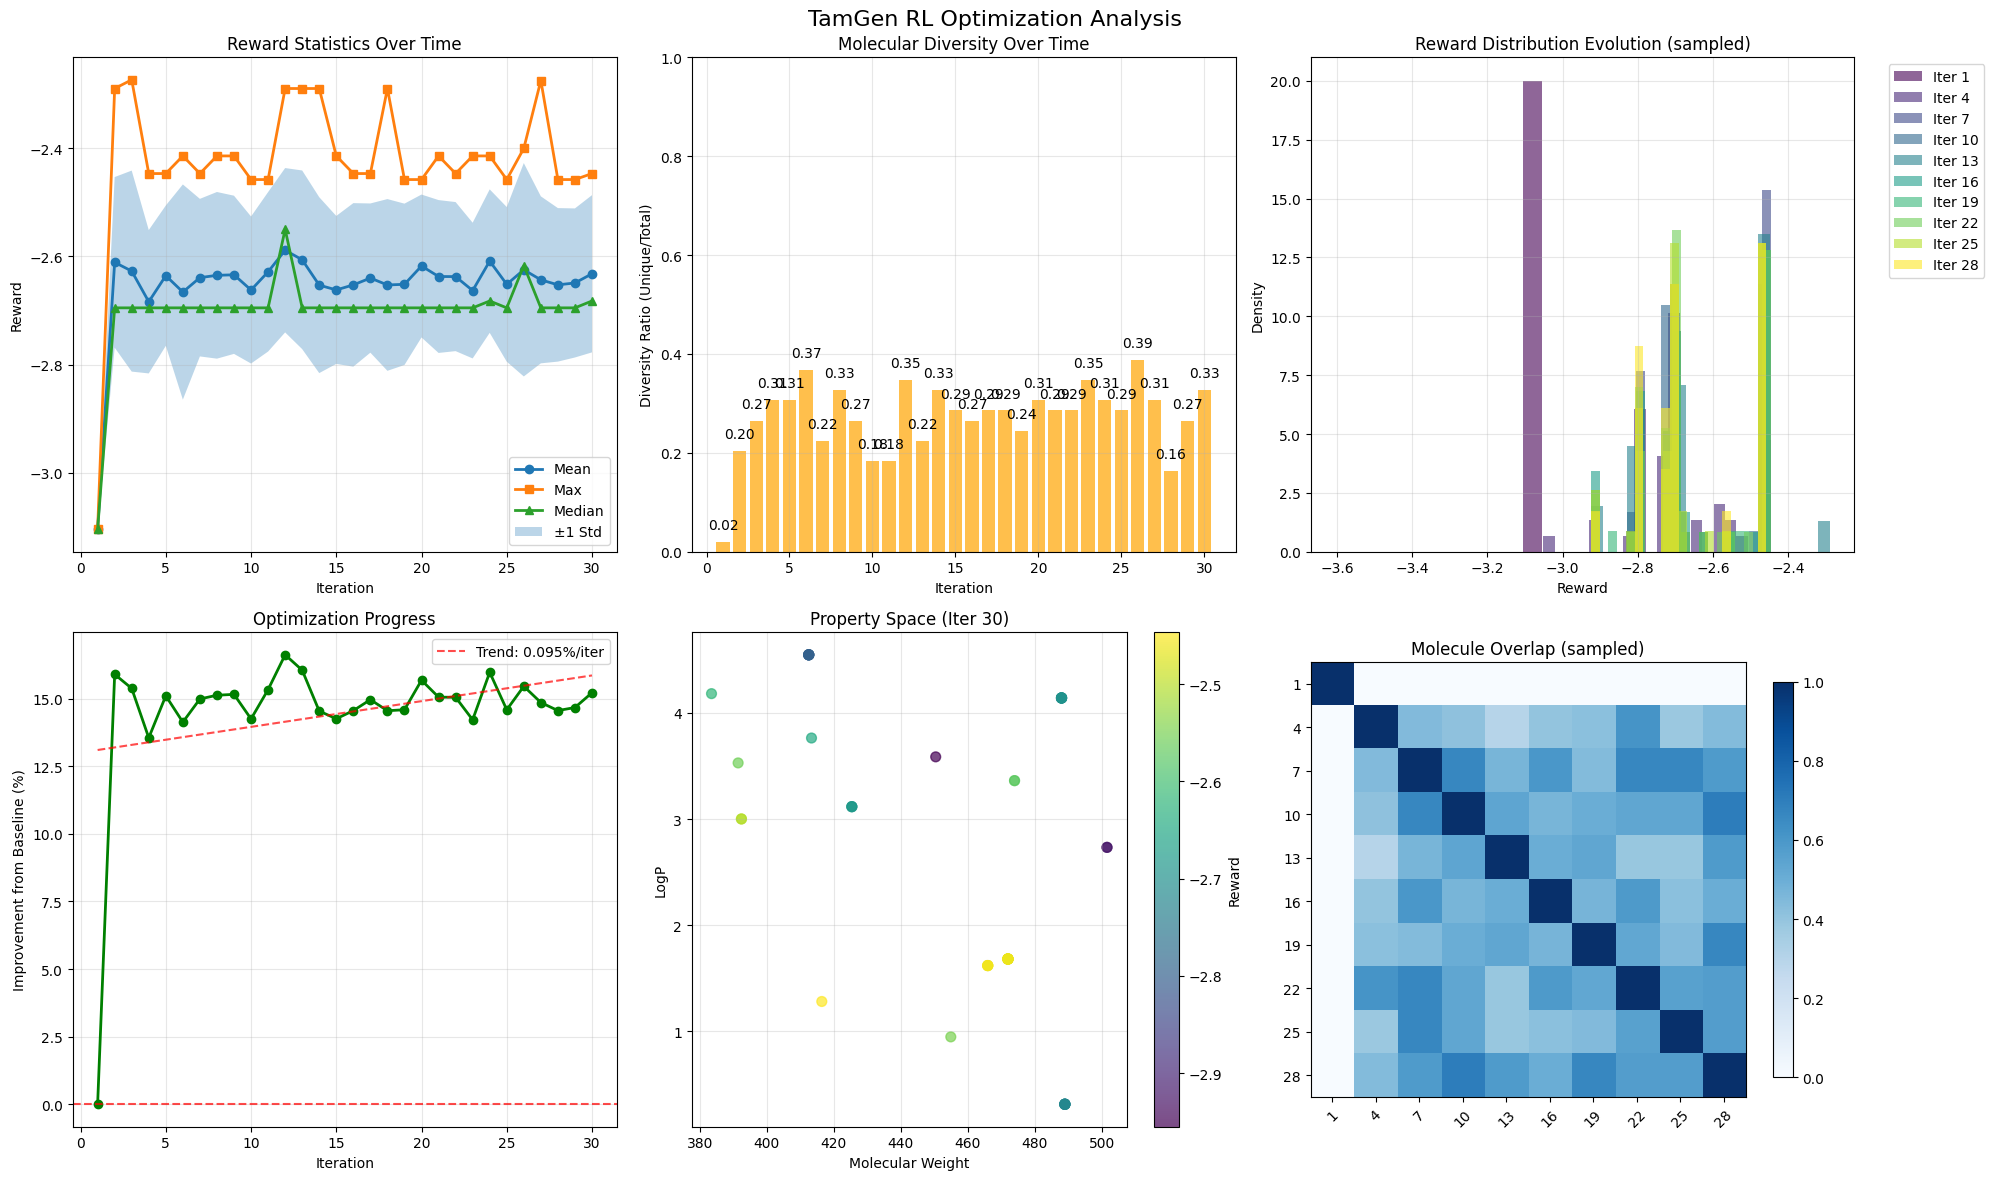


📈 DETAILED ANALYSIS
📈 TRENDING: Mean rewards still changing (std = 0.010)
📊 OVERALL IMPROVEMENT: +15.2% from baseline
🏆 BEST MOLECULE: C[C@@H](C(=O)O)c1ccc(-c2ccccc2)c(F)c1
   Reward: -2.273 (Iteration 3)
➡️ DIVERSITY STABLE: 0.003/iteration

💡 RECOMMENDATIONS
🔄 CONSIDER STOPPING: Minimal recent improvement
   - Try different hyperparameters
   - Or accept current results

🔍 LONG RUN INSIGHTS:
   - Total iterations analyzed: 30
   - Total unique molecules discovered: 50
   - Improvement over last 10 iterations: +0.2%
   - Total molecules evaluated: 1470

📋 SUMMARY STATISTICS
   Best reward found: -2.273
   Final mean reward: -2.632
   Current diversity: 32.7%
   Iterations completed: 30
✅ Analysis completed successfully!


In [6]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

def analyze_reward_convergence():
    """
    Comprehensive analysis of reward function convergence and molecular properties
    """
    
    print("🔬 REWARD CONVERGENCE ANALYSIS")
    print("=" * 60)
    
    # Load reward files
    reward_files = sorted(glob.glob('latent_logs/rewards_iter_*.tsv'))
    if not reward_files:
        print("❌ No reward files found in latent_logs/")
        return
    
    print(f"📊 Found {len(reward_files)} iteration files")
    
    # Parse data with robust error handling
    iteration_data = {}
    all_molecules = set()
    
    for i, f in enumerate(reward_files):
        rewards = []
        molecules = []
        try:
            with open(f, 'r', encoding='utf-8') as fin:
                for line_num, line in enumerate(fin):
                    line = line.strip()
                    if not line:  # Skip empty lines
                        continue
                    parts = line.split('\t')
                    if len(parts) >= 2:
                        mol_smiles = parts[0].strip()
                        try:
                            reward = float(parts[1])
                            # Basic sanity check on reward values
                            if not np.isnan(reward) and not np.isinf(reward):
                                rewards.append(reward)
                                molecules.append(mol_smiles)
                                all_molecules.add(mol_smiles)
                        except (ValueError, TypeError):
                            print(f"   ⚠️ Warning: Invalid reward value at line {line_num+1} in {f}")
                            continue
        except Exception as e:
            print(f"   ❌ Error reading {f}: {e}")
            continue
        
        if rewards:  # Only add if we have valid data
            iteration_data[i+1] = {
                'rewards': np.array(rewards),
                'molecules': molecules,
                'mean': np.mean(rewards),
                'max': np.max(rewards),
                'median': np.median(rewards),
                'std': np.std(rewards),
                'unique_count': len(set(molecules))
            }
            
            print(f"   Iter {i+1}: {len(rewards)} molecules, {len(set(molecules))} unique, "
                  f"reward range [{np.min(rewards):.3f}, {np.max(rewards):.3f}]")
        else:
            print(f"   ❌ No valid data in {f}")
    
    if not iteration_data:
        print("❌ No valid iteration data found!")
        return None
    
    # Create comprehensive plots
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('TamGen RL Optimization Analysis', fontsize=16)
    
    iterations = sorted(list(iteration_data.keys()))
    n_iterations = len(iterations)
    
    # 1. Reward Statistics Over Time
    ax1 = axes[0, 0]
    means = [iteration_data[i]['mean'] for i in iterations]
    maxs = [iteration_data[i]['max'] for i in iterations]
    medians = [iteration_data[i]['median'] for i in iterations]
    stds = [iteration_data[i]['std'] for i in iterations]
    
    ax1.plot(iterations, means, 'o-', label='Mean', linewidth=2)
    ax1.plot(iterations, maxs, 's-', label='Max', linewidth=2)
    ax1.plot(iterations, medians, '^-', label='Median', linewidth=2)
    ax1.fill_between(iterations, 
                     [m - s for m, s in zip(means, stds)],
                     [m + s for m, s in zip(means, stds)],
                     alpha=0.3, label='±1 Std')
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Reward')
    ax1.set_title('Reward Statistics Over Time')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Diversity Analysis
    ax2 = axes[0, 1]
    total_counts = [len(iteration_data[i]['molecules']) for i in iterations]
    unique_counts = [iteration_data[i]['unique_count'] for i in iterations]
    diversity_ratios = [u/t for u, t in zip(unique_counts, total_counts)]
    
    ax2.bar(iterations, diversity_ratios, alpha=0.7, color='orange')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Diversity Ratio (Unique/Total)')
    ax2.set_title('Molecular Diversity Over Time')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 1)
    
    # Add text annotations
    for i, ratio in zip(iterations, diversity_ratios):
        ax2.text(i, ratio + 0.02, f'{ratio:.2f}', ha='center', va='bottom')
    
    # 3. Reward Distribution Evolution (sample for high iteration counts)
    ax3 = axes[0, 2]
    # For many iterations, only show a subset to avoid cluttered plot
    if n_iterations > 10:
        step = max(1, n_iterations // 8)  # Show max 8 distributions
        sample_iterations = iterations[::step]
        colors = plt.cm.viridis(np.linspace(0, 1, len(sample_iterations)))
        for iter_idx, color in zip(sample_iterations, colors):
            rewards = iteration_data[iter_idx]['rewards']
            ax3.hist(rewards, bins=min(20, len(rewards)//2), alpha=0.6, 
                    label=f'Iter {iter_idx}', color=color, density=True)
        ax3.set_title(f'Reward Distribution Evolution (sampled)')
    else:
        colors = plt.cm.viridis(np.linspace(0, 1, len(iterations)))
        for i, color in zip(iterations, colors):
            rewards = iteration_data[i]['rewards']
            ax3.hist(rewards, bins=min(20, len(rewards)//2), alpha=0.6, 
                    label=f'Iter {i}', color=color, density=True)
        ax3.set_title('Reward Distribution Evolution')
    
    ax3.set_xlabel('Reward')
    ax3.set_ylabel('Density')
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax3.grid(True, alpha=0.3)
    
    # 4. Convergence Analysis
    ax4 = axes[1, 0]
    # Calculate running improvement
    improvements = []
    base_mean = means[0]
    for mean in means:
        improvements.append((mean - base_mean) / abs(base_mean) * 100)
    
    ax4.plot(iterations, improvements, 'o-', linewidth=2, color='green')
    ax4.axhline(y=0, color='red', linestyle='--', alpha=0.7)
    ax4.set_xlabel('Iteration')
    ax4.set_ylabel('Improvement from Baseline (%)')
    ax4.set_title('Optimization Progress')
    ax4.grid(True, alpha=0.3)
    
    # Add trend line
    if len(iterations) > 2:
        try:
            z = np.polyfit(iterations, improvements, 1)
            p = np.poly1d(z)
            ax4.plot(iterations, p(iterations), '--', alpha=0.7, color='red',
                    label=f'Trend: {z[0]:.3f}%/iter')
            ax4.legend()
        except np.RankWarning:
            pass  # Skip trend line if fitting fails
    
    # 5. Molecular Property Analysis (if we can parse SMILES)
    ax5 = axes[1, 1]
    try:
        # Analyze molecular properties for last iteration
        last_iter = max(iterations)
        last_molecules = iteration_data[last_iter]['molecules']
        last_rewards = iteration_data[last_iter]['rewards']
        
        # Calculate molecular properties
        mw_values = []
        logp_values = []
        valid_rewards = []
        
        for mol_smiles, reward in zip(last_molecules, last_rewards):
            mol = Chem.MolFromSmiles(mol_smiles)
            if mol is not None:
                mw = Descriptors.MolWt(mol)
                logp = Descriptors.MolLogP(mol)
                mw_values.append(mw)
                logp_values.append(logp)
                valid_rewards.append(reward)
        
        if mw_values:
            scatter = ax5.scatter(mw_values, logp_values, c=valid_rewards, 
                                cmap='viridis', alpha=0.7, s=50)
            ax5.set_xlabel('Molecular Weight')
            ax5.set_ylabel('LogP')
            ax5.set_title(f'Property Space (Iter {last_iter})')
            plt.colorbar(scatter, ax=ax5, label='Reward')
            ax5.grid(True, alpha=0.3)
        else:
            ax5.text(0.5, 0.5, 'No valid molecules\nfor property analysis', 
                    ha='center', va='center', transform=ax5.transAxes)
            ax5.set_title('Property Analysis Failed')
    
    except Exception as e:
        ax5.text(0.5, 0.5, f'Property analysis failed:\n{str(e)}', 
                ha='center', va='center', transform=ax5.transAxes)
        ax5.set_title('Property Analysis Error')
    
    # 6. Molecule Overlap Analysis (optimize for many iterations)
    ax6 = axes[1, 2]
    if len(iterations) > 1:
        # For many iterations, sample to keep matrix readable
        if n_iterations > 15:
            step = max(1, n_iterations // 10)  # Show max 10x10 matrix
            sample_iters = iterations[::step]
            overlap_matrix = np.zeros((len(sample_iters), len(sample_iters)))
            for i, iter1 in enumerate(sample_iters):
                for j, iter2 in enumerate(sample_iters):
                    set1 = set(iteration_data[iter1]['molecules'])
                    set2 = set(iteration_data[iter2]['molecules'])
                    if len(set1.union(set2)) > 0:
                        overlap = len(set1.intersection(set2)) / len(set1.union(set2))
                    else:
                        overlap = 0
                    overlap_matrix[i, j] = overlap
            
            im = ax6.imshow(overlap_matrix, cmap='Blues', vmin=0, vmax=1)
            ax6.set_xticks(range(len(sample_iters)))
            ax6.set_yticks(range(len(sample_iters)))
            ax6.set_xticklabels([f'{i}' for i in sample_iters], rotation=45)
            ax6.set_yticklabels([f'{i}' for i in sample_iters])
            ax6.set_title(f'Molecule Overlap (sampled)')
        else:
            overlap_matrix = np.zeros((len(iterations), len(iterations)))
            for i, iter1 in enumerate(iterations):
                for j, iter2 in enumerate(iterations):
                    set1 = set(iteration_data[iter1]['molecules'])
                    set2 = set(iteration_data[iter2]['molecules'])
                    if len(set1.union(set2)) > 0:
                        overlap = len(set1.intersection(set2)) / len(set1.union(set2))
                    else:
                        overlap = 0
                    overlap_matrix[i, j] = overlap
            
            im = ax6.imshow(overlap_matrix, cmap='Blues', vmin=0, vmax=1)
            ax6.set_xticks(range(len(iterations)))
            ax6.set_yticks(range(len(iterations)))
            ax6.set_xticklabels([f'{i}' for i in iterations])
            ax6.set_yticklabels([f'{i}' for i in iterations])
            ax6.set_title('Molecule Set Overlap (Jaccard)')
            
            # Add text annotations only for smaller matrices
            if len(iterations) <= 10:
                for i in range(len(iterations)):
                    for j in range(len(iterations)):
                        ax6.text(j, i, f'{overlap_matrix[i, j]:.2f}',
                                ha='center', va='center', 
                                color='white' if overlap_matrix[i, j] > 0.5 else 'black')
        
        plt.colorbar(im, ax=ax6, shrink=0.8)
    else:
        ax6.text(0.5, 0.5, 'Need multiple iterations\nfor overlap analysis', 
                ha='center', va='center', transform=ax6.transAxes)
        ax6.set_title('Molecule Overlap Analysis')
    
    plt.tight_layout()
    
    # Save plot with error handling
    try:
        plt.savefig('latent_logs/reward_analysis.png', dpi=300, bbox_inches='tight')
        print("📊 Analysis plot saved to 'latent_logs/reward_analysis.png'")
    except Exception as e:
        print(f"⚠️ Could not save plot: {e}")
    
    plt.show()
    
    # Print detailed analysis
    print("\n📈 DETAILED ANALYSIS")
    print("=" * 60)
    
    # Convergence assessment with robust statistics
    if len(iterations) >= 3:
        recent_window = min(5, len(iterations))  # Use last 5 iterations or all if fewer
        recent_means = means[-recent_window:]
        mean_change = np.std(recent_means)
        if mean_change < 0.01:
            print("🔄 CONVERGENCE: Mean rewards have stabilized (std < 0.01)")
        else:
            print(f"📈 TRENDING: Mean rewards still changing (std = {mean_change:.3f})")
        
        # Check for improvement
        total_improvement = (means[-1] - means[0]) / abs(means[0]) * 100
        print(f"📊 OVERALL IMPROVEMENT: {total_improvement:+.1f}% from baseline")
        
        # Best molecules
        try:
            best_iter = max(iterations, key=lambda x: iteration_data[x]['max'])
            best_reward = iteration_data[best_iter]['max']
            best_idx = np.argmax(iteration_data[best_iter]['rewards'])
            best_molecule = iteration_data[best_iter]['molecules'][best_idx]
            
            print(f"🏆 BEST MOLECULE: {best_molecule}")
            print(f"   Reward: {best_reward:.3f} (Iteration {best_iter})")
        except Exception as e:
            print(f"⚠️ Could not identify best molecule: {e}")
        
        # Diversity trend
        try:
            diversity_trend = np.polyfit(iterations, diversity_ratios, 1)[0]
            if diversity_trend < -0.01:
                print(f"⚠️ DIVERSITY DECLINING: {diversity_trend:.3f}/iteration")
            elif diversity_trend > 0.01:
                print(f"✅ DIVERSITY IMPROVING: {diversity_trend:.3f}/iteration")
            else:
                print(f"➡️ DIVERSITY STABLE: {diversity_trend:.3f}/iteration")
        except Exception:
            print("⚠️ Could not calculate diversity trend")
    
    # Recommendations with robust checks
    print("\n💡 RECOMMENDATIONS")
    print("=" * 30)
    
    latest_diversity = diversity_ratios[-1] if diversity_ratios else 0
    if latest_diversity < 0.1:
        print("🔧 INCREASE EXPLORATION: Very low diversity detected")
        print("   - Increase noise_sigma (try 0.1-0.2)")
        print("   - Reduce shift_alpha (try 0.2-0.3)")
        print("   - Add diversity penalty to reward function")
    
    if len(iterations) >= 3:
        try:
            recent_improvement = (means[-1] - means[-3]) / abs(means[-3]) * 100
            if abs(recent_improvement) < 1:
                print("🔄 CONSIDER STOPPING: Minimal recent improvement")
                print("   - Try different hyperparameters")
                print("   - Or accept current results")
            elif recent_improvement > 0:
                print("✅ CONTINUE OPTIMIZATION: Still improving")
            else:
                print("📉 OPTIMIZATION ISSUES: Performance declining")
        except Exception:
            print("⚠️ Could not assess recent improvement")
    
    # Additional insights for long runs
    if len(iterations) >= 10:
        print(f"\n🔍 LONG RUN INSIGHTS:")
        print(f"   - Total iterations analyzed: {len(iterations)}")
        print(f"   - Total unique molecules discovered: {len(all_molecules)}")
        
        # Check for plateaus
        if len(means) >= 10:
            last_10_improvement = (means[-1] - means[-10]) / abs(means[-10]) * 100
            print(f"   - Improvement over last 10 iterations: {last_10_improvement:+.1f}%")
            
        # Memory usage estimate
        total_molecules = sum(len(iteration_data[i]['molecules']) for i in iterations)
        print(f"   - Total molecules evaluated: {total_molecules}")
    
    print(f"\n📋 SUMMARY STATISTICS")
    print(f"   Best reward found: {max(maxs):.3f}")
    print(f"   Final mean reward: {means[-1]:.3f}")
    print(f"   Current diversity: {latest_diversity:.1%}")
    print(f"   Iterations completed: {len(iterations)}")
    
    return iteration_data

if __name__ == "__main__":
    result = analyze_reward_convergence()
    if result is not None:
        print("✅ Analysis completed successfully!")
    else:
        print("❌ Analysis failed - check your data files!")